## Task

Create one plot from the dataset "istherecorrelation.csv", with DPI=300. The objective is to visualize the data as you see fit. Include the resulting image in the markdown file and write a few lines of interpretation.

In [17]:
import pandas as pd
import matplotlib as plt
import csv

In [128]:
#Read and process the data into a workable pandas dataframe

df = pd.read_csv("istherecorrelation.csv", sep=';')

#The commas in the values of the WO column were making it hard to work with
#Could not process them so I removed them and converted the values from string to int

for i in range(0,13):
    df["WO [x1000]"][i]= df["WO [x1000]"][i][0:3]
    
df["WO [x1000]"] = df["WO [x1000]"].astype(int)

#Here I am adding to the dataframe 2 columns representing yearly change of beer and WO in %

df.insert(2, "WO Pct change",df["WO [x1000]"].pct_change(fill_method ='ffill') , True)
df.insert(4, "Beer Pct change" , df["NL Beer consumption [x1000 hectoliter]"].pct_change(fill_method ='ffill') , True)


/var/folders/2s/0g4z6h8s333cd_nsjh25yp1c0000gn/T/ipykernel_7535/326008770.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["WO [x1000]"][i]= df["WO [x1000]"][i][0:3]


In [129]:
#To better understand the data

#df.head()
pd.DataFrame.describe(df)

,Year,WO [x1000],WO Pct change,NL Beer consumption [x1000 hectoliter],Beer Pct change
count,13.00000,13.000000,12.000000,13.000000,12.000000
mean,2012.00000,239.923077,0.026495,11579.461538,0.004620
std,3.89444,23.464376,0.019623,189.661811,0.006108
min,2006.00000,205.000000,-0.016327,11402.000000,-0.003655
25%,2009.00000,220.000000,0.018082,11474.000000,-0.000216
50%,2012.00000,242.000000,0.023259,11492.000000,0.004261
75%,2015.00000,255.000000,0.037959,11601.000000,0.008712
max,2018.00000,280.000000,0.059091,12048.000000,0.015680


<AxesSubplot:xlabel='Year', ylabel='NL Beer consumption [x1000 hectoliter]'>

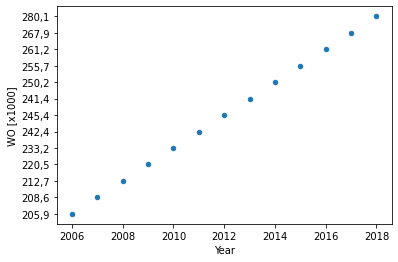

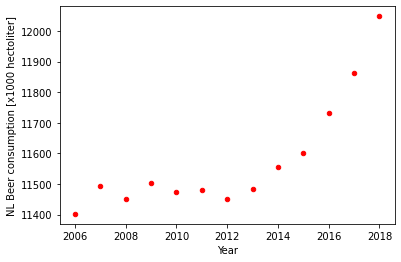

In [30]:
#Basic plots

df.plot(kind='scatter',x='Year',y='WO [x1000]')
df.plot(kind='scatter',x='Year',y='NL Beer consumption [x1000 hectoliter]', color='red')

<AxesSubplot:xlabel='Year'>

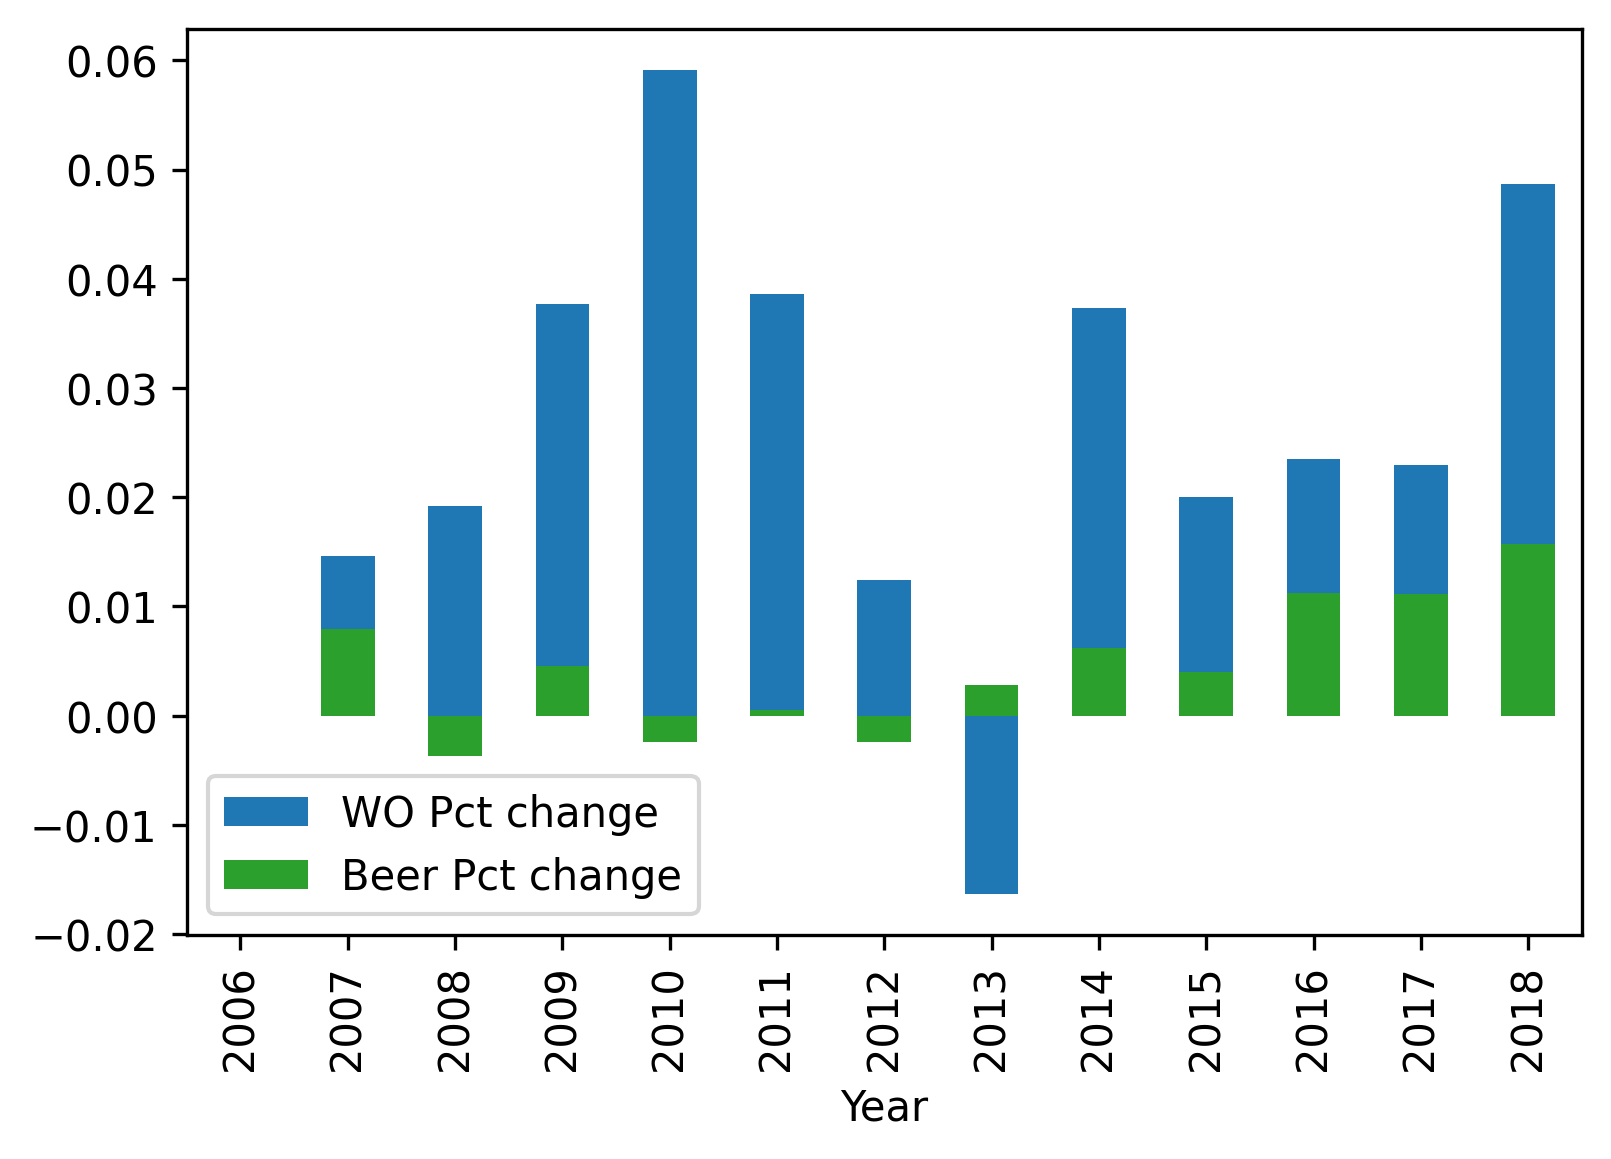

In [135]:
#plt.figure(dpi=150)
plt.rcParams["figure.dpi"] = 300
ax = df.plot(x='Year', y="WO Pct change", kind="bar")
df.plot(x='Year', y="Beer Pct change", kind="bar", ax=ax, color="C2")

Doesn't seem to be correlated at all.